In [1]:
import math
import time
from random import random, randrange, uniform, choice

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from src.utils import dijkstra, distance, average
from src.graph import Graph, Line
from src.rrt import iRRT_s, RRT, RRT_s
from src.visualisation import plot_graph, plot_graph_simple
from src.prm import PRM


In [2]:
def evaluate_single(variation, startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size, obstacles, goals, iterations):
    average_RRT_times = []
    average_BRRT_times = []
    std_RRT_times = []
    std_BRRT_times = []
    for goal in goals:
        RRT_times = []
        BRRT_times = []
        for sample in range(sample_size):
            obstacle_bias = False
                        
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'prm':
                start_RRT = time.time() #record start time
                prm_planner = PRM(iterations, obstacles= obstacles, start= startposition, destination = endposition, goal=goal)
                prm_planner.runPRM()
                end_RRT = time.time()

            
            RRT_time = end_RRT - start_RRT
            RRT_times.append(RRT_time)
            
            obstacle_bias = True
            
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'prm':
                start_RRT = time.time() #record start time
                prm_planner = PRM(iterations, obstacles= obstacles, start= startposition, destination = endposition, goal=goal)
                prm_planner.runPRM()
                end_RRT = time.time()
            
            BRRT_time = end_RRT - start_RRT
            BRRT_times.append(BRRT_time)

        average_RRT_time = average(RRT_times)
        std_RRT_time = np.std(RRT_times)
        average_RRT_times.append(average_RRT_time)
        std_RRT_times.append(std_RRT_time) 
        
        average_BRRT_time = average(BRRT_times)
        std_BRRT_time = np.std(BRRT_times)
        average_BRRT_times.append(average_BRRT_time)
        std_BRRT_times.append(std_BRRT_time) 
     
    return average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times


if __name__ == '__main__':
    startposition = (0.,0.,0.)
    endposition = (10.,5.,5.)
    
    threshold = 2. 
    stepsize = 1. 

    bias = 0.2
    rand_radius = 0.5
    
    sample_size = 10
    obstacles = [(5.,2.5,2.5,3)]
    goals = np.linspace(1.30,1.40,6)
    iterations = 200
    
    save_to_disk = True
    
    # average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times = evaluate_single('RRT', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size, obstacles, goals, iterations)
    average_RRTs_times, average_BRRTs_times, std_RRTs_times, std_BRRTs_times = evaluate_single('RRT_s', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size, obstacles, goals, iterations)
    average_iRRTs_times, average_iBRRTs_times, std_iRRTs_times, std_iBRRTs_times = evaluate_single('iRRT_s', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size, obstacles, goals, iterations)
    average_prm_times, average_Bprm_times, std_prm_times, std_Bprm_times = evaluate_single('prm', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size, obstacles, goals, iterations)

    if save_to_disk:
        np.save("arrays/{average_RRTs_times}.npy", average_RRTs_times)
        np.save("arrays/{average_BRRTs_times}.npy", average_BRRTs_times)
        np.save("arrays/{average_iRRTs_times}.npy", average_iRRTs_times)
        np.save("arrays/{average_iBRRTs_times}.npy", average_iBRRTs_times)
        np.save("arrays/{average_prm_times}.npy", average_prm_times)
        

PRM Iteration 0, with N:200, Seed 42
PRM Iteration 1, with N:200, Seed 87045
PRM Iteration 2, with N:200, Seed 98418
PRM Iteration 3, with N:200, Seed 87525
PRM Iteration 4, with N:200, Seed 81754
PRM Iteration 5, with N:200, Seed 91683
PRM Iteration 6, with N:200, Seed 14440
PRM Iteration 7, with N:200, Seed 14059
PRM Iteration 8, with N:200, Seed 54551
PRM Iteration 9, with N:200, Seed 15612
PRM Iteration 10, with N:200, Seed 12886
PRM Iteration 11, with N:200, Seed 9343
PRM Iteration 12, with N:200, Seed 33708
PRM Iteration 13, with N:200, Seed 57810
PRM Iteration 14, with N:200, Seed 94368
PRM Iteration 15, with N:200, Seed 84988
PRM Iteration 16, with N:200, Seed 28669
PRM Iteration 17, with N:200, Seed 42958
PRM Iteration 18, with N:200, Seed 65527
PRM Iteration 19, with N:200, Seed 15707
PRM Iteration 20, with N:200, Seed 40618
PRM Iteration 21, with N:200, Seed 88755
PRM Iteration 22, with N:200, Seed 64908
PRM Iteration 23, with N:200, Seed 96148
PRM Iteration 24, with N:200, 

In [3]:
load_stats_from_disk = False
if load_stats_from_disk:
    average_RRTs_times = np.load('arrays/{average_RRTs_times}.npy')
    average_BRRTs_times = np.load('arrays/{average_BRRTs_times}.npy')
    average_iRRTs_times = np.load('arrays/{average_iRRTs_times}.npy')
    average_iBRRTs_times = np.load('arrays/{average_iBRRTs_times}.npy')

[12.830586671829224, 5.22032253742218, 2.8434831619262697, 8.999086117744445, 2.769161009788513, 3.5719425678253174]


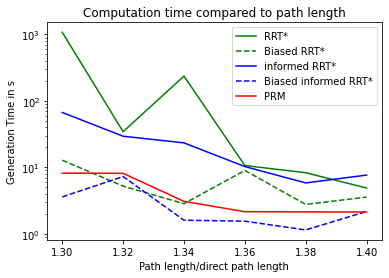

In [5]:
fig = plt.figure()
# goals = np.linspace(1.34,1.39,6)
goals = np.linspace(1.30,1.40,6)
plt.yscale('log')
plt.ylabel('Generation Time in s')
plt.xlabel('Path length/direct path length')
#plt.errorbar(goals, average_RRT_times, yerr = std_RRT_times, label = "RRT", color = 'o', ecolor='black', capsize=10)
#plt.errorbar(goals, average_BRRT_times, yerr = std_BRRT_times, label = "Biased RRT", linestyle='--', color = 'o', ecolor='black', capsize=10)
#plt.errorbar(goals, average_RRTs_times, yerr = std_RRTs_times, label = "RRT*", color = 'g', ecolor='black', capsize=10)
# plt.errorbar(goals, average_BRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_BRRTs_times] , label = "Biased RRT*", linestyle='--', color = 'g', ecolor='black', capsize=10)
#plt.errorbar(goals, average_iRRTs_times, yerr = std_iRRTs_times, label = "informed RRT*", color = 'b', ecolor='black', capsize=10)
# plt.errorbar(goals, average_iBRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_iBRRTs_times], label = "Biased informed RRT*", linestyle='--', color = 'b', ecolor='black', capsize=10)
plt.plot(goals, average_RRTs_times, label = "RRT*", color = 'g')
plt.plot(goals, average_BRRTs_times, label = "Biased RRT*", linestyle='--', color = 'g')
plt.plot(goals, average_iRRTs_times, label = "informed RRT*", color = 'b')
plt.plot(goals, average_iBRRTs_times, label = "Biased informed RRT*", linestyle='--', color = 'b')
plt.plot(goals, average_prm_times, label = "PRM", color = 'r')
plt.title('Computation time compared to path length')
plt.legend()
print(average_BRRTs_times)
# print(std_BRRTs_times)


In [81]:
def evaluate_bias(variation, startposition, endposition, threshold, rand_radius, goal, stepsize, sample_size):
    obstacles = [(5.,2.5,2.5,3)]
    bias_list = np.linspace(0,0.8,9)
    iterations = 200
    obstacle_bias = True
    average_BRRT_times = []
   
    std_BRRT_times = []
    for bias in bias_list:
        
        BRRT_times = []
        for sample in range(sample_size):

            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            
            BRRT_time = end_RRT - start_RRT
            BRRT_times.append(BRRT_time)
        
        average_BRRT_time = average(BRRT_times)
        std_BRRT_time = np.std(BRRT_times)
        average_BRRT_times.append(average_BRRT_time)
        std_BRRT_times.append(std_BRRT_time) 
     
    return average_BRRT_times, std_BRRT_times


if __name__ == '__main__':
    startposition = (0.,0.,0.)
    endposition = (10.,5.,5.)
    
    threshold = 2. 
    stepsize = 1. 

    goal = 1.36
    rand_radius = 0.5
    
    sample_size = 20
    
    #average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times = evaluate_single('RRT', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size)
    average_BRRTs_times, std_BRRTs_times = evaluate_bias('RRT_s', startposition, endposition, threshold, rand_radius, goal, stepsize, sample_size)
    average_iBRRTs_times, std_iBRRTs_times = evaluate_bias('iRRT_s', startposition, endposition, threshold, rand_radius, goal, stepsize, sample_size)

[8.659072875976562, 4.531684494018554, 2.9920475363731383, 11.022029900550843, 4.689996552467346, 3.2892539739608764, 27.342872273921966, 29.530092203617095, 145.61395404338836]
[19.431146942585773, 7.059116105975554, 3.473166774730473, 33.270934910304256, 8.757011423194806, 5.624928151783951, 83.4055115519692, 69.61861403941711, 427.30161637880167]


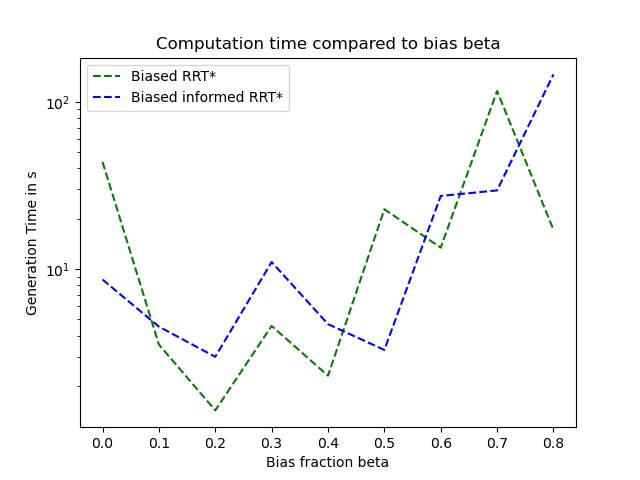

In [90]:
fig = plt.figure()
bias_list = np.linspace(0,0.8,9)
plt.yscale('log')
plt.ylabel('Generation Time in s')
plt.xlabel('Bias fraction beta')

#plt.errorbar(bias_list, average_BRRT_times, yerr = std_BRRT_times, label = "Biased RRT", linestyle='--', color = 'o', ecolor='black', capsize=10)
#plt.errorbar(bias_list, average_BRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_BRRTs_times] , label = "Biased RRT*", linestyle='--', color = 'g')
#plt.errorbar(bias_list, average_iRRTs_times, yerr = std_iRRTs_times, label = "informed RRT*", color = 'b', ecolor='black', capsize=10)
#plt.errorbar(bias_list, average_iBRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_iBRRTs_times], label = "Biased informed RRT*", linestyle='--', color = 'b')

plt.plot(bias_list, average_BRRTs_times, label = "Biased RRT*", linestyle='--', color = 'g')

plt.plot(bias_list, average_iBRRTs_times, label = "Biased informed RRT*", linestyle='--', color = 'b')
plt.title('Computation time compared to bias beta')
plt.legend()
print(average_iBRRTs_times)
print(std_iBRRTs_times)

In [ ]:
# Doing many iterations and compare, will take some time
if __name__ == '__main__':
    
    startposition = (0.,0.,0.)
    endposition = (10.,5.,5.)
    obstacles = [(1.,1.,1.,.5),(3.,4.,5.,1.),(4,2,3,1),(6,3,1,2),(6,1,1,2),(8,1,4,1)]
    iterations = 200
    threshold = 2. #for marking the end position as found
    stepsize = 1. # stepsize of newly generated vertices
    
    #some parameters for the obstacle bias attempt
    obstacle_bias = False
    bias = 0.2
    rand_radius = 0.5
    
    sample_size = 100
    
    RRT_times = []
    RRT_lengths = []
    RRT_succesrate = 0
    for sample in range(sample_size):
        
        start_RRT = time.time() #record start time
        G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        RRT_time = end_RRT - start_RRT
        RRT_times.append(RRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            RRT_lengths.append(length)
            RRT_succesrate = RRT_succesrate + 1
        else:
            RRT_succesrate = RRT_succesrate
    
    average_RRT_time = average(RRT_times)
    average_RRT_length = average(RRT_lengths)
    RRT_succes_percentage = (RRT_succesrate/sample_size)*100
    
    obstacle_bias = True
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):
        
        start_RRT = time.time() #record start time
        G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate
    
    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    
    print('The direct path is of length:', round(distance(startposition,endposition),2))
    print('The average time for RRT was: '+str(round(average_RRT_time,2))+ 's')
    print('The average time for Biased RRT was: '+str(round(average_BRRT_time,2))+ 's')
    print('The average length for RRT was: '+str(round(average_RRT_length,2)))
    print('The average length for Biased RRT was: '+str(round(average_BRRT_length,2)))
    print('The RRT generation had a succesrate of: '+str(round(RRT_succes_percentage,2))+ '%')
    print('The Biased RRT generation had a succesrate of: '+str(round(BRRT_succes_percentage,2))+ '%')

In [2]:
# Evaluate at various bias settings, will take some time


startposition = (0.,0.,0.)
endposition = (10.,5.,5.)
obstacles = [(5.,2.5,2.5,3)]
iterations = 300
threshold = 2. #for marking the end position as found
stepsize = 1. # stepsize of newly generated vertices

#some parameters for the obstacle bias attempt
obstacle_bias = True
bias_list = np.linspace(0,0.8,9)
print(bias_list)
rand_radius = 0.5

sample_size = 5

average_BRRT_times = []
average_BRRT_lengths = []
BRRT_succes_percentages = []
std_BRRT_times = []
std_BRRT_lengths = []

average_BRRTs_times = []
average_BRRTs_lengths = []
BRRTs_succes_percentages = []
std_BRRTs_times = []
std_BRRTs_lengths = []

average_iBRRTs_times = []
average_iBRRTs_lengths = []
iBRRTs_succes_percentages = []
std_iBRRTs_times = []
std_iBRRTs_lengths = []

for bias in bias_list:
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):

        start_RRT = time.time() #record start time
        G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate

    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    std_BRRT_time = np.std(BRRT_times)
    if len(BRRT_lengths) == 0:
        std_BRRT_length = 0
    else:
        std_BRRT_length = np.std(BRRT_lengths)

    average_BRRT_times.append(average_BRRT_time)
    average_BRRT_lengths.append(average_BRRT_length)
    BRRT_succes_percentages.append(BRRT_succes_percentage)
    std_BRRT_times.append(std_BRRT_time) 
    std_BRRT_lengths.append(std_BRRT_length) 

for bias in bias_list:
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):

        start_RRT = time.time() #record start time
        G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate

    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    std_BRRT_time = np.std(BRRT_times)
    if len(BRRT_lengths) == 0:
        std_BRRT_length = 0
    else:
        std_BRRT_length = np.std(BRRT_lengths)

    average_BRRTs_times.append(average_BRRT_time)
    average_BRRTs_lengths.append(average_BRRT_length)
    BRRTs_succes_percentages.append(BRRT_succes_percentage)
    std_BRRTs_times.append(std_BRRT_time) 
    std_BRRTs_lengths.append(std_BRRT_length) 

for bias in bias_list:
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):

        start_RRT = time.time() #record start time
        G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate

    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    std_BRRT_time = np.std(BRRT_times)
    if len(BRRT_lengths) == 0:
        std_BRRT_length = 0
    else:
        std_BRRT_length = np.std(BRRT_lengths)

    average_iBRRTs_times.append(average_BRRT_time)
    average_iBRRTs_lengths.append(average_BRRT_length)
    iBRRTs_succes_percentages.append(BRRT_succes_percentage)
    std_iBRRTs_times.append(std_BRRT_time) 
    std_iBRRTs_lengths.append(std_BRRT_length)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

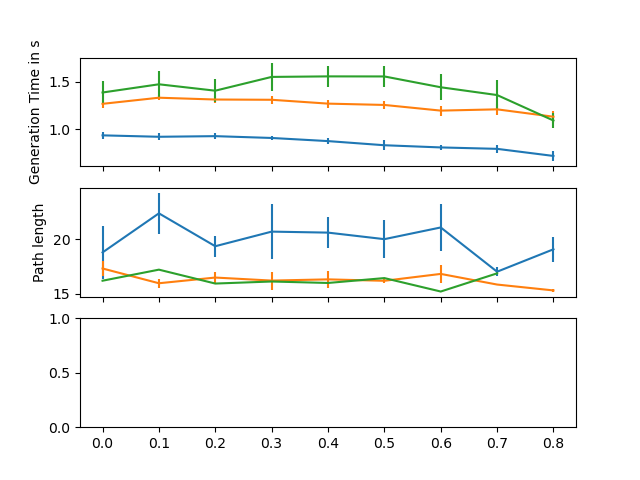

In [4]:

fig, ax = plt.subplots(3,sharex=True)

#plt.plot(bias_list, average_BRRT_times, label = "Generation time")

ax[0].set_ylabel('Generation Time in s')
ax[0].errorbar(bias_list, average_BRRT_times, yerr = std_BRRT_times, label = "RRT")
ax[0].errorbar(bias_list, average_BRRTs_times, yerr = std_BRRTs_times, label = "RRT*")
ax[0].errorbar(bias_list, average_iBRRTs_times, yerr = std_iBRRTs_times, label = "informed RRT*")


#plt.plot(bias_list, average_BRRT_lengths, label = "RRT")
#plt.plot(bias_list, average_BRRTs_lengths, label = "RRT*")

ax[1].set_ylabel('Path length')
ax[1].errorbar(bias_list, average_BRRT_lengths, yerr = std_BRRT_lengths, label = "RRT")
ax[1].errorbar(bias_list, average_BRRTs_lengths, yerr = std_BRRTs_lengths, label = "RRT*")
ax[1].errorbar(bias_list, average_iBRRTs_lengths, yerr = std_iBRRTs_lengths, label = "Informed RRT*")


ax[2].plot(bias_list, BRRT_succes_percentages, label = "RRT")
ax[2].plot(bias_list, BRRTs_succes_percentages, label = "RRT*")
ax[2].plot(bias_list, iBRRTs_succes_percentages, label = "Informed RRT*")
ax[2].set_xlabel('Obstacle Bias')
ax[2].set_ylabel('Succes Rate')

handles, labels = ax[2].get_legend_handles_labels()
fig.set_figheight(10)
fig.legend(handles, labels, loc="lower left", bbox_to_anchor=(0.12,0.1))

